In [1]:
import pandas as pd
import math
satc_all_lines_w_rating = pd.read_csv("satc_all_lines_w_rating.csv").drop(["Unnamed: 0"],axis=1)
satc_all_lines_w_rating['S_E'] = satc_all_lines_w_rating['Season'].astype(int).astype(str)+"_"+satc_all_lines_w_rating['Episode'].astype(int).astype(str)
satc_all_lines_w_rating.head()

,Season,Episode,Speaker,Line,date_job,ep_data_name,ep_data_url,ID,Rating,S_E
0,1,1,Carrie,"Once upon a time, an English journalist came t...",NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1
1,1,1,Carrie,Elizabeth was attractive and bright.,NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1
2,1,1,Carrie,Right away she hooked up with one of the city'...,NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1
3,1,1,Tim,The question remains-- Is this really a compan...,NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1
4,1,1,Carrie,"Tim was 42, a well-liked and respected investm...",NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1


To dos: 
+ Group all lines of same season + episode together
+ preprocess the text, tokenization, remove stopwords 

C:\Users\dorar_000\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


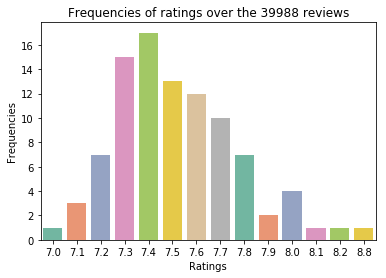

In [53]:
%matplotlib inline

# Distribution of Ratings
import seaborn as sns 
import matplotlib.pyplot as plt

# Plotting rating distribution
X_ratings = satc_all_lines_w_rating.groupby(['S_E']).min().Rating.value_counts()
x = sns.barplot(X_ratings.index,X_ratings,palette="Set2")
x.set(xlabel='Ratings',ylabel='Frequencies',title='Frequencies of ratings over the {} reviews'.format(satc_all_lines_w_rating.shape[0]))
plt.show()
#X_ratings


In [3]:
#text transformation

satc_all_lines_w_rating["cleaned"] = satc_all_lines_w_rating.Line.tolist()
#all to lowercase 
satc_all_lines_w_rating.cleaned = [str(line).lower() for line in satc_all_lines_w_rating.cleaned]

#remove special chars
chars_remove = ["@", "/", "#", ".", ",", "!", "?", "(", ")", "-", "_","’","'", "\"", ":"]
trans_dict = {initial:" " for initial in chars_remove}
satc_all_lines_w_rating.cleaned = [line.translate(str.maketrans(trans_dict)) for line in satc_all_lines_w_rating.cleaned]
satc_all_lines_w_rating.head()

,Season,Episode,Speaker,Line,date_job,ep_data_name,ep_data_url,ID,Rating,S_E,cleaned
0,1,1,Carrie,"Once upon a time, an English journalist came t...",NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,once upon a time an english journalist came t...
1,1,1,Carrie,Elizabeth was attractive and bright.,NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,elizabeth was attractive and bright
2,1,1,Carrie,Right away she hooked up with one of the city'...,NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,right away she hooked up with one of the city ...
3,1,1,Tim,The question remains-- Is this really a compan...,NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,the question remains is this really a compan...
4,1,1,Carrie,"Tim was 42, a well-liked and respected investm...",NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,tim was 42 a well liked and respected investm...


In [4]:
#Tokenization
# NLP library imports

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize

from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dorar_000\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dorar_000\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dorar_000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#We are using NLKT tokenizer to split all text up into individual tokens
#we can try different tokenizer here 
satc_all_lines_w_rating["tokenized"] = [word_tokenize(line) for line in satc_all_lines_w_rating.cleaned]

#Removing stopwords for topic extraction using nltk stopwords library
stopw = stopwords.words('english')
satc_all_lines_w_rating["w_o_stopwords"] = [[token for token in line if token not in stopw if len(token)>2] for line in satc_all_lines_w_rating.tokenized]
satc_all_lines_w_rating.head()

,Season,Episode,Speaker,Line,date_job,ep_data_name,ep_data_url,ID,Rating,S_E,cleaned,tokenized,w_o_stopwords
0,1,1,Carrie,"Once upon a time, an English journalist came t...",NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,once upon a time an english journalist came t...,"[once, upon, a, time, an, english, journalist,...","[upon, time, english, journalist, came, new, y..."
1,1,1,Carrie,Elizabeth was attractive and bright.,NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,elizabeth was attractive and bright,"[elizabeth, was, attractive, and, bright]","[elizabeth, attractive, bright]"
2,1,1,Carrie,Right away she hooked up with one of the city'...,NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,right away she hooked up with one of the city ...,"[right, away, she, hooked, up, with, one, of, ...","[right, away, hooked, one, city, typically, el..."
3,1,1,Tim,The question remains-- Is this really a compan...,NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,the question remains is this really a compan...,"[the, question, remains, is, this, really, a, ...","[question, remains, really, company, want]"
4,1,1,Carrie,"Tim was 42, a well-liked and respected investm...",NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,tim was 42 a well liked and respected investm...,"[tim, was, 42, a, well, liked, and, respected,...","[tim, well, liked, respected, investment, bank..."


C:\Users\dorar_000\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


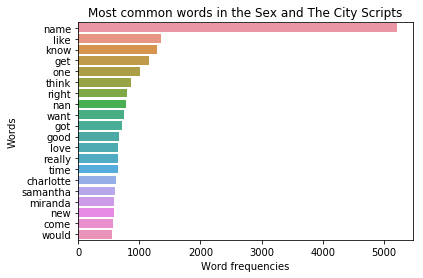

In [6]:
import numpy as np
#visualisation of the words
all_words = []
for line in satc_all_lines_w_rating["w_o_stopwords"]:
    for word in line:
        all_words.append(word)

dist = nltk.FreqDist(all_words)
X = [nb[1] for nb in dist.most_common(20)]
y = [nb[0] for nb in dist.most_common(20)]
x = sns.barplot(np.array(X),np.array(y))
x.set(xlabel='Word frequencies',ylabel='Words',title='Most common words in the Sex and The City Scripts')
plt.show()


C:\Users\dorar_000\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


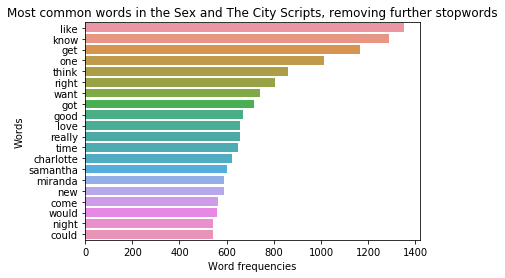

In [7]:

#adding oh, nan and na to the list of stopwords, as well as the names of the main characters
#main_chars = ["charlotte","samantha","carrie","miranda"]
new_stopw = stopw + ["oh","nan","name"] #+ main_chars
satc_all_lines_w_rating["w_o_stopwords_2"] = [[token for token in line if token not in new_stopw if len(token)>2] for line in satc_all_lines_w_rating.tokenized]


all_words = []
for line in satc_all_lines_w_rating["w_o_stopwords_2"]:
    for word in line:
        all_words.append(word)

dist = nltk.FreqDist(all_words)
X = [nb[1] for nb in dist.most_common(20)]
y = [nb[0] for nb in dist.most_common(20)]
x = sns.barplot(np.array(X),np.array(y))
x.set(xlabel='Word frequencies',ylabel='Words',title='Most common words in the Sex and The City Scripts, removing further stopwords')
plt.show()

In [8]:
#saving tokenized data set
satc_all_lines_w_rating.to_csv("satc_all_lines_w_rating_tokenized.csv")

# Lemmatization

In [9]:
# apply lemmatization from wordnet in order to merge words that come from the same meaning .- for example, "friend" and "friends" should be counted as the same word

def lemmatize(tokens):
    tokens = [WordNetLemmatizer().lemmatize(WordNetLemmatizer().lemmatize(WordNetLemmatizer().lemmatize(token,pos='a'),pos='v'),pos='n') for token in tokens]
    return tokens  

satc_all_lines_w_rating["lemmatized"] = [lemmatize(line) for line in satc_all_lines_w_rating.w_o_stopwords_2]

In [10]:
#look at the difference in words 
print(satc_all_lines_w_rating.w_o_stopwords_2[0:10])
print(satc_all_lines_w_rating.lemmatized[0:10])

0    [upon, time, english, journalist, came, new, y...
1                      [elizabeth, attractive, bright]
2    [right, away, hooked, one, city, typically, el...
3           [question, remains, really, company, want]
4    [tim, well, liked, respected, investment, bank...
5    [met, one, evening, typical, new, york, fashio...
6                                               [like]
7           [yes, actually, think, quite, interesting]
8                        [feel, like, know, somewhere]
9                            [doubtful, moved, london]
Name: w_o_stopwords_2, dtype: object
0    [upon, time, english, journalist, come, new, y...
1                      [elizabeth, attractive, bright]
2    [right, away, hook, one, city, typically, elig...
3            [question, remain, really, company, want]
4    [tim, well, like, respect, investment, banker,...
5    [meet, one, even, typical, new, york, fashion,...
6                                               [like]
7              [yes, actuall

C:\Users\dorar_000\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


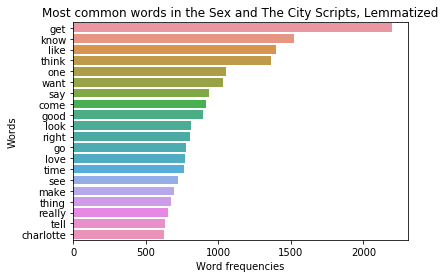

In [11]:
all_words = []
for line in satc_all_lines_w_rating["lemmatized"]:
    for word in line:
        all_words.append(word)

dist = nltk.FreqDist(all_words)
X = [nb[1] for nb in dist.most_common(20)]
y = [nb[0] for nb in dist.most_common(20)]
x = sns.barplot(np.array(X),np.array(y))
x.set(xlabel='Word frequencies',ylabel='Words',title='Most common words in the Sex and The City Scripts, Lemmatized')
plt.show()

# TF-IDF Matrix  
in order to highlight words specific to an episode

In [12]:
#group by episode to define one episode as one document for tf-idf

#initizalize new df
satc_text_per_episode = pd.DataFrame(
    columns=list(satc_all_lines_w_rating)[5:10])

#init
current_s_e = "1_1"
all_lines = []

for index, row in satc_all_lines_w_rating.iterrows():
        if(row.S_E == current_s_e):
            #we use the lemmatized version of the lines, change here for different choice of text preprocessing
            all_lines.append(row.lemmatized)

        if row.S_E != current_s_e:
            #flatten all tokens for previous episode and add them to the dataframe
            flat_all_lines = [word for line in all_lines for word in line]
            #add a new row to new df, taking the information from the index-1 (the last s_e)
            satc_text_per_episode = satc_text_per_episode.append({'ep_data_name': satc_all_lines_w_rating.ep_data_name[index-1],
                                                                  'ep_data_url': satc_all_lines_w_rating.ep_data_url[index-1],
                                                                  'ID': satc_all_lines_w_rating.ID[index-1],
                                                                  'Rating': satc_all_lines_w_rating.Rating[index-1],
                                                                  'S_E': satc_all_lines_w_rating.S_E[index-1],
                                                                  'all_text': flat_all_lines}, ignore_index=True)
            #update vars
            all_lines = []
            current_s_e = row.S_E


satc_text_per_episode.head()

,ep_data_name,ep_data_url,ID,Rating,S_E,all_text
0,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,"[upon, time, english, journalist, come, new, y..."
1,Models and Mortals,https://www.imdb.com/title/tt0698649/?ref_=tte...,698649,7.4,1_2,"[date, nick, fairly, successful, sport, agent,..."
2,Bay of Married Pigs,https://www.imdb.com/title/tt0698618/?ref_=tte...,698618,7.4,1_3,"[friend, patience, husband, invite, hampton, w..."
3,Valley of the Twenty-Something Guys,https://www.imdb.com/title/tt0698697/?ref_=tte...,698697,7.5,1_4,"[seem, meet, everywhere, street, corner, party..."
4,The Power of Female Sex,https://www.imdb.com/title/tt0698688/?ref_=tte...,698688,7.3,1_5,"[host, balzac, overnight, become, restaurant, ..."


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
##create the tfidf matrix
vect = TfidfVectorizer(analyzer ='word',ngram_range=(1,1),encoding='latin1')
vect_transformed = vect.fit_transform([text for text in satc_text_per_episode['all_text'].astype(str)])

feature_names = np.array(vect.get_feature_names())

satc_tfidf = pd.concat([satc_text_per_episode[['S_E','ep_data_name','ID','Rating']],
                        pd.DataFrame(vect_transformed.todense(), columns = feature_names)],axis=1)

satc_tfidf.head()

,S_E,ep_data_name,ID,Rating,000,00am,00pm,100,1000,101,...,zoie,zone,zoo,zooey,zorro,zsa,zsu,zucchini,zygote,éclairs
0,1_1,Sex and the City,698663,7.4,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1_2,Models and Mortals,698649,7.4,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1_3,Bay of Married Pigs,698618,7.4,0.017015,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1_4,Valley of the Twenty-Something Guys,698697,7.5,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1_5,The Power of Female Sex,698688,7.3,0.069914,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#some words with smallest and largest tfids
sorted_tfidf_index = vect_transformed.max(0).toarray()[0].argsort()
print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['tiny' 'whenever' 'familiar' 'obvious' 'track' 'skin' 'perform' 'hall'
 'replace' 'tip']

Largest tfidf: 
['laney' 'threesome' 'pattern' 'fake' 'soul' 'model' 'yankee' 'phil'
 'javier' 'zsa']


## Feature engineering

In [16]:
from collections import Counter

def get_features(method ='tf', k=100):
    k=k
    if (method == 'tfidf'):
        #getting topK highest tfidf words
        top_k = feature_names[sorted_tfidf_index[:-(k+1):-1]]
    elif (method == 'tf'):
        #topK most common words
        counter = Counter([item for sublist in satc_text_per_episode['all_text'] for item in sublist])
        top_k = counter.most_common(k)
    else:
        top_k = None
        print("Bad input!! Choose tf or tfidf as first arg")
    
    return list(top_k)

In [17]:
features_words = get_features('tfidf',50)

# PCA

In [18]:
#only keep 95% of vars 
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## Regression

In [19]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

lm = LassoCV(n_alphas=100, alphas=[.01,.1,1,10,100]) 

features_df = satc_tfidf[satc_tfidf.columns[4:]].filter(features_words,axis=1)
features = features_df.as_matrix()

target_df = satc_tfidf['Rating']
target = target_df.as_matrix()

C:\Users\dorar_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\dorar_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [20]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 

cms={}
labels = satc_tfidf['Rating'].unique()
num_run = 10
        
for i in range (num_run):
       
    # separate datasets into training and test datasets once, no folding
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3)
    features_train_pca = pca.fit_transform(features_train)
    features_test_pca = pca.transform(features_test)


    # train the features and target datasets and fit to a model
    trained_lm = lm.fit(features_train, target_train)


    # predict target with feature test set using trained model
    target_pred_train = list(trained_lm.predict(features_train))
    target_pred_test = list(trained_lm.predict(features_test))

    cms[i]=[metrics.mean_squared_error(target_test, target_pred_test),
            metrics.mean_absolute_error (target_test, target_pred_test),
            metrics.explained_variance_score(target_test, target_pred_test),
            metrics.r2_score(target_test, target_pred_test)]
    

In [21]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 

cms_pca={}
labels = satc_tfidf['Rating'].unique()
num_run = 10
        
for i in range (num_run):
       
    # separate datasets into training and test datasets once, no folding
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3)
    features_train_pca = pca.fit_transform(features_train)
    features_test_pca = pca.transform(features_test)


    # train the features and target datasets and fit to a model
    trained_lm = lm.fit(features_train_pca, target_train)


    # predict target with feature test set using trained model
    target_pred_train = list(trained_lm.predict(features_train_pca))
    target_pred_test = list(trained_lm.predict(features_test_pca))

    cms_pca[i]=[metrics.mean_squared_error(target_test, target_pred_test),
            metrics.mean_absolute_error (target_test, target_pred_test),
            metrics.explained_variance_score(target_test, target_pred_test),
            metrics.r2_score(target_test, target_pred_test)]
    

In [22]:
pd.DataFrame.from_dict(cms_pca,orient='index',columns=['MSE','MAbsE', 'Explained_variance_score','R^2'])

,MSE,MAbsE,Explained_variance_score,R^2
0,0.049823,0.185714,1.110223e-16,-0.005706
1,0.066480,0.215989,0.000000e+00,-0.038453
2,0.051131,0.187033,-2.220446e-16,-0.046108
3,0.054839,0.200549,0.000000e+00,-0.000793
4,0.064109,0.208132,-2.220446e-16,-0.004429
5,0.059200,0.171868,-4.440892e-16,-0.012499
6,0.074100,0.219121,0.000000e+00,-0.007878
7,0.033411,0.144505,0.000000e+00,-0.001303
8,0.045360,0.172912,-4.440892e-16,-0.165589
9,0.064914,0.207363,-2.220446e-16,-0.011386


In [23]:
pd.DataFrame(target_test, target_pred_test)

,0
7.501538,7.5
7.501538,7.1
7.501538,7.4
7.501538,7.3
7.501538,7.4
7.501538,7.4
7.501538,7.2
7.501538,7.2
7.501538,7.3
7.501538,7.6


### Regression Trees


In [24]:
# Get the predictors and the response values
X = satc_tfidf[satc_tfidf.columns[4:]].filter(features_words,axis=1).values

y = satc_tfidf['Rating'].values
# The lab uses a 50/50 split. We'll do the same
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

satc_tfidf.head()
len(X_train)
len(satc_tfidf[satc_tfidf.columns[4:]].filter(features_words,axis=1).values)

C:\Users\dorar_000\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


93

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import tree, export_graphviz
import graphviz


# Create an sklearn decision tree object using the mse metric for splitting, considering all the features and 
# splitting if there are more than 10 samples at a node.
tree = DecisionTreeRegressor(max_features=None, min_samples_split=10)
tree_est = tree.fit(X_train, y_train)
tree_est

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

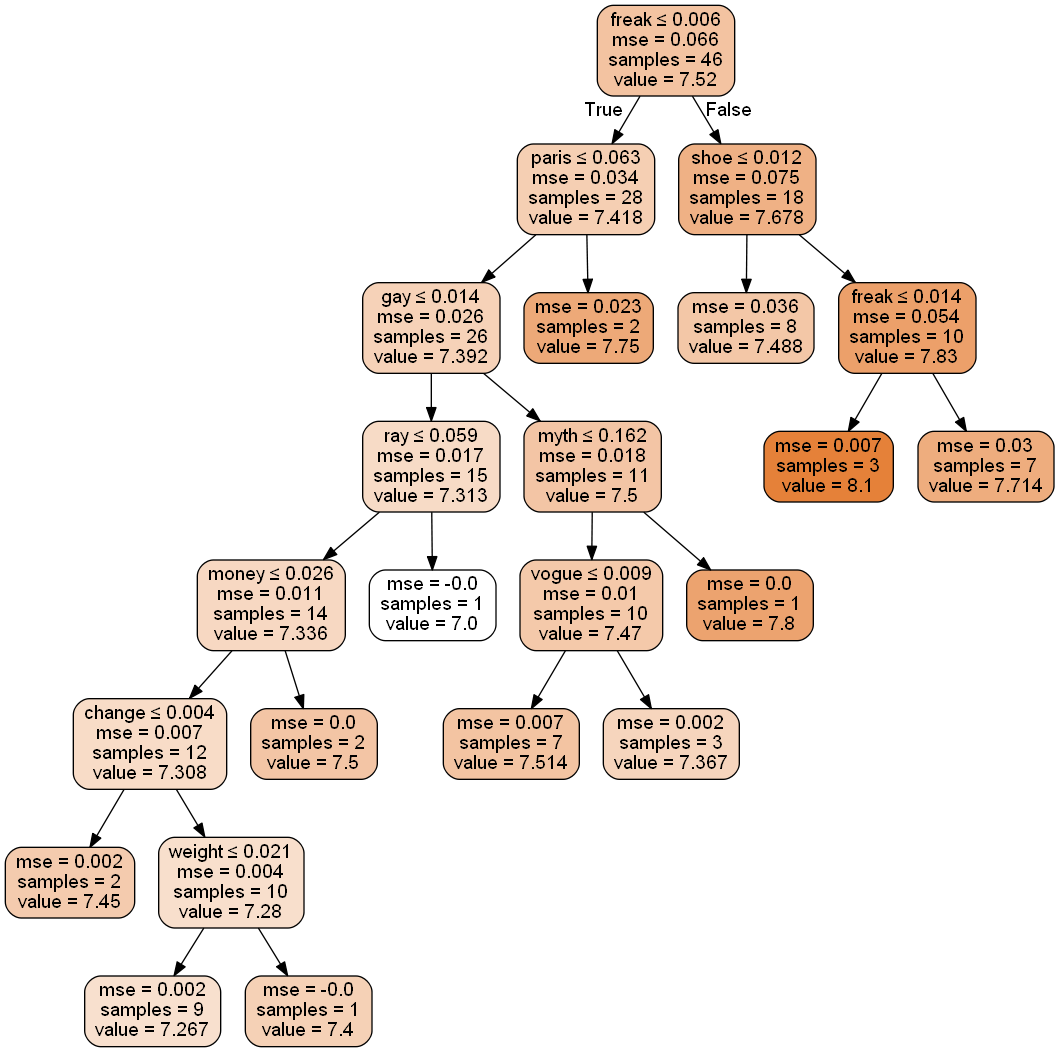

In [32]:
from IPython.display import Image, display


# use sklearn's export to generate the dot-data string file with all the nodes and their props.
dot_data = export_graphviz(tree_est, out_file='boston_tree.dot',feature_names=satc_tfidf[satc_tfidf.columns[4:]].filter(features_words,axis=1).columns[0:],filled=True, 
                           rounded=True, special_characters=True)

with open('boston_tree.dot') as f:
    dot_graph = f.read()  

# create the source object
I = graphviz.Source(dot_graph, format='png', engine='dot')
# Use ipython Image to shrink the rendered image of the source obj to fit into jupyter nb.
Image(I.render())


In [33]:
feature_importances = pd.Series(data=tree.feature_importances_, index=list(satc_tfidf[satc_tfidf.columns[4:]].filter(features_words,axis=1)))
feature_importances.sort_values(axis=0, ascending=False)

freak         0.436809
shoe          0.216348
paris         0.098600
gay           0.091761
ray           0.043651
myth          0.041082
money         0.026133
change        0.019988
vogue         0.018990
weight        0.006639
ghost         0.000000
sandwich      0.000000
honeymoon     0.000000
whore         0.000000
church        0.000000
rabbit        0.000000
sam           0.000000
shrink        0.000000
taddy         0.000000
zsa           0.000000
dildo         0.000000
javier        0.000000
phil          0.000000
yankee        0.000000
model         0.000000
soul          0.000000
fake          0.000000
pattern       0.000000
threesome     0.000000
cheat         0.000000
jeremy        0.000000
karma         0.000000
mao           0.000000
game          0.000000
keith         0.000000
ovary         0.000000
marry         0.000000
raw           0.000000
stewardess    0.000000
pregnant      0.000000
train         0.000000
jim           0.000000
berger        0.000000
review     

In [34]:
# Get the predictions from the tree for the test set
y_pred = tree_est.predict(X_test)

# Scatter plot the predicted versus actual values
fig,ax = plt.subplots(1,1, figsize=(8,6));
ax.scatter(y_pred, y_test, facecolor='None', edgecolor='b');
# add a reference unity line
ax.plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], linestyle='--', color='k');
ax.set_xlabel('y_predicted')
ax.set_ylabel('y_actual')

# print the mse
mse_dt = np.mean((y_pred-y_test)**2)
print("Test MSE = ", mse_dt)

Test MSE =  0.08263034025667013


In [35]:
features_words = get_features('tfidf',150)

In [36]:
error_rates_regression_tree=[metrics.mean_squared_error(y_test, y_pred),
            metrics.mean_absolute_error (y_test, y_pred),
            metrics.explained_variance_score(y_test, y_pred),
            metrics.r2_score(y_test, y_pred)]

In [37]:
error_rates_regression_tree

[0.08263034025667013,
 0.24214792299898688,
 -0.6152811745265498,
 -0.6317756269174355]

## Bagging Model

In [38]:
from sklearn.ensemble import RandomForestRegressor

bagger = RandomForestRegressor(n_estimators=500)
bag_est =  bagger.fit(X_train, y_train)


In [39]:
y_pred = bagger.predict(X_test)

# Plot the predicted vs the actual medv response
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(y_pred, y_test, facecolor='None', edgecolor='b')
# add a reference unity line
ax.plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], linestyle='--', color='k');
ax.set_xlabel('y_predicted')
ax.set_ylabel('y_actual')

mse_ba = np.mean((y_pred-y_test)**2)
print("Test MSE = ", mse_ba)

Test MSE =  0.05459901531914638


In [40]:
error_rates_bagging=[metrics.mean_squared_error(y_test, y_pred),
            metrics.mean_absolute_error (y_test, y_pred),
            metrics.explained_variance_score(y_test, y_pred),
            metrics.r2_score(y_test, y_pred)]

In [41]:
error_rates_bagging

[0.05459901531914638,
 0.19769787234041833,
 -0.07704564276769332,
 -0.07821584873944554]

# Random Forest

## XG Boost

In [44]:
import xgboost as xgb
features_df 
#target_df
test_df = pd.concat([target_df,features_df],axis=1)[0:60]
train_df = pd.concat([target_df,features_df],axis=1)[60:]
#train_df = pd.concat([target_df,features_df],axis=1)

In [45]:
# read in data
dtrain = xgb.DMatrix(train_df)
dtest = xgb.DMatrix(test_df)
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'reg:linear' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
#preds = bst.predict(dtest)



XGBoostError: b'[09:20:47] C:/Users/Administrator/Desktop/xgboost/src/objective/regression_obj.cu:64: Check failed: info.labels_.Size() != 0U (0 vs. 0) label set cannot be empty'

In [54]:
model = xgb.XGBRegressor( max_depth=4)

In [55]:
model.fit(features_train_pca,target_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [56]:
y_pred = model.predict(features_test_pca)

Test MSE =  0.13132963302255182


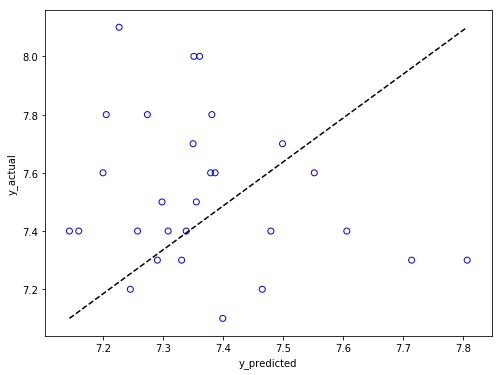

In [57]:
y_test=target_test
# Plot the predicted vs the actual medv response
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(y_pred, y_test, facecolor='None', edgecolor='b')
# add a reference unity line
ax.plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], linestyle='--', color='k');
ax.set_xlabel('y_predicted')
ax.set_ylabel('y_actual')

mse_ba = np.mean((y_pred-y_test)**2)
print("Test MSE = ", mse_ba)

In [58]:
pd.DataFrame(y_test,y_pred)

,0
7.355461,7.5
7.399588,7.1
7.338630,7.4
7.290468,7.3
7.143674,7.4
7.257359,7.4
7.465567,7.2
7.245354,7.2
7.330945,7.3
7.379362,7.6


In [59]:
error_rates_xgboost=[metrics.mean_squared_error(y_test, y_pred),
            metrics.mean_absolute_error (y_test, y_pred),
            metrics.explained_variance_score(y_test, y_pred),
            metrics.r2_score(y_test, y_pred)]

In [60]:
error_rates_xgboost


[0.13132963302255182,
 0.2904279027666364,
 -0.6559623286101068,
 -1.0461532648982654]

### Keyword Lookup

In [1]:
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors

In [2]:
w2v = KeyedVectors.load_word2vec_format("C:\\Users\\dorar_000\\Documents\\GoogleNews-vectors-negative300.bin.gz", binary = True)

KeyboardInterrupt: 

In [ ]:
def my_vector_getter(word, wv=w2v) :
    # returns the vector of a word
    try:
        # we use reshape because cosine similarity in sklearn now works only for multidimensional arrays
        word_array = wv[word].reshape(1,-1)
        return word_array
    except KeyError:
        print('word: <', word, '> not in vocabulary!')

In [ ]:
my_vector_getter('carrie', w2v)